Importation des librairies

In [ ]:
#calculation libraries
import pandas as pd
import numpy as np
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#All machine learning libraries
import sklearn as sklearn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix,
    precision_recall_curve, fbeta_score, precision_score, recall_score, f1_score
)
from sklearn.base import clone  # pour cloner le préprocesseur


Importation de données

In [113]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [114]:
df_train.head(31)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Prétaitement des données et analyse exploratoire

In [115]:
headers = df_train.columns
print(df_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [116]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [119]:
def preprocess_keepcols_and_preview(df_train: pd.DataFrame, n_rows: int = 20):
    df = df_train.copy()

    # 0) Texte propre (Sex / Embarked)
    if 'Sex' in df.columns:
        df['Sex'] = df['Sex'].astype('string').str.strip().str.lower()
    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].astype('string').str.strip().str.upper()
        df.loc[~df['Embarked'].isin(['S','C','Q']) & df['Embarked'].notna(), 'Embarked'] = pd.NA

    # 0b) EXTRACTION Title AVANT de drop 'Name'
    if 'Name' in df.columns:
        titles = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).astype('string').str.strip()
        map_rare = {
            'Mlle':'Miss','Ms':'Miss','Mme':'Mrs',
            'Lady':'Rare','Countess':'Rare','Capt':'Rare','Col':'Rare','Don':'Rare',
            'Dr':'Rare','Major':'Rare','Rev':'Rare','Sir':'Rare','Jonkheer':'Rare'
        }
        df['Title'] = titles.replace(map_rare).fillna('Rare')

    # 1) Colonnes peu utiles (après extraction du Title)
    df = df.drop(columns=['Cabin', 'Ticket', 'Name'], errors='ignore')

    # 2) Imputations légères / nettoyage lignes
    if 'Embarked' in df.columns and df['Embarked'].isna().any():
        mode_emb = df['Embarked'].mode(dropna=True)
        if not mode_emb.empty:
            df['Embarked'] = df['Embarked'].fillna(mode_emb[0])

    df = df.dropna(subset=['Age', 'Fare'], how='all')

    if 'PassengerId' in df.columns:
        df = df.drop_duplicates(subset=['PassengerId'], keep='first')

    # 3) Imputations numériques robustes
    if set(['Age','Pclass','Sex']).issubset(df.columns):
        df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform('median'))
    if df['Age'].isna().any():
        df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))
    if df['Age'].isna().any():
        df['Age'] = df['Age'].fillna(df['Age'].median())

    if 'Fare' in df.columns and df['Fare'].isna().any():
        df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # 4) Nouvelles features (signal utile)
    if set(['SibSp','Parch']).issubset(df.columns):
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
        df['IsAlone']    = (df['FamilySize'] == 1).astype(int)

    if 'Age' in df.columns:
        df['IsChild'] = (df['Age'] < 16).astype(int)

    if set(['Sex','Pclass']).issubset(df.columns):
        df['Sex_Pclass'] = (df['Sex'].astype('string') + "_" + df['Pclass'].astype(str)).astype('string')

    # 5) Préprocesseur pour la LogReg (ne modifie PAS df)
    num_skew = [c for c in ['Fare'] if c in df.columns]  # log1p + Z-score
    num_std  = [c for c in ['Age','SibSp','Parch','Pclass','FamilySize','IsAlone'] if c in df.columns]  # Z-score
    # On traite IsChild (0/1) et Sex_Pclass comme catégorielles pour capter des effets non-linéaires simples
    cat_cols = [c for c in ['Sex','Embarked','Title','IsChild','Sex_Pclass'] if c in df.columns]

    pre = ColumnTransformer([
        ('skew', Pipeline([
            ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one')),
            ('sc',  StandardScaler())
        ]), num_skew),
        ('num', StandardScaler(), num_std),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ], remainder='drop', verbose_feature_names_out=False)

    features   = num_skew + num_std + cat_cols
    X          = df[features].copy()
    X_trans    = pre.fit_transform(X)
    feat_names = pre.get_feature_names_out()

    # 6) Aperçu lisible
    with pd.option_context('display.max_columns', None, 'display.width', 140, 'display.float_format', '{:,.2f}'.format):
        cols_view = [c for c in [
            'PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',
            'Title','FamilySize','IsAlone','IsChild','Sex_Pclass'
        ] if c in df.columns]
        print("\n=== Aperçu DataFrame (enrichi) ===")
        print(df.head(n_rows)[cols_view].to_string(index=False))
        print("\n=== NaN restants par colonne ===")
        print(df.isna().sum().to_string())
        print("\n=== Aperçu des FEATURES après normalisation/encodage (échantillon) ===")
        preview_rows = min(n_rows, X_trans.shape[0], 10)
        print(pd.DataFrame(X_trans[:preview_rows], columns=feat_names).to_string(index=False))

    return df, pre, feat_names


Visualisation des données 

=== Aperçu DataFrame ===
 PassengerId  Survived  Pclass                         Name                         Sex    Age  SibSp  Parch      Ticket        Fare  Cabin Embarked
      1          0        3                                Braund, Mr. Owen Harris   male 22.0   1      0           A/5 21171  7.2500   NaN    S    
      2          1        1    Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0   1      0            PC 17599 71.2833   C85    C    
      3          1        3                                 Heikkinen, Miss. Laina female 26.0   0      0    STON/O2. 3101282  7.9250   NaN    S    
      4          1        1           Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0   1      0              113803 53.1000  C123    S    
      5          0        3                               Allen, Mr. William Henry   male 35.0   0      0              373450  8.0500   NaN    S    
      6          0        3                                       Moran, Mr. Jame

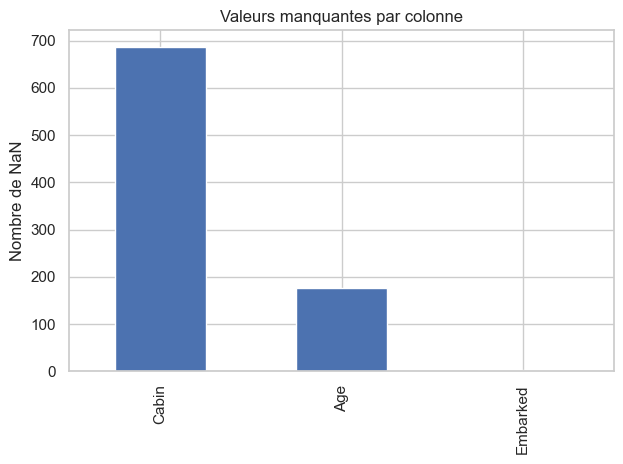

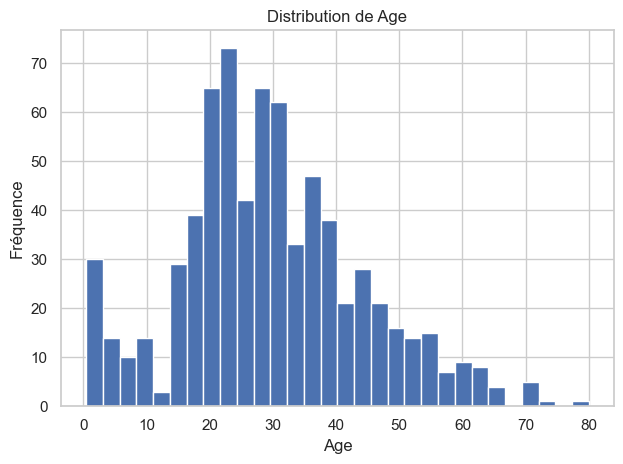

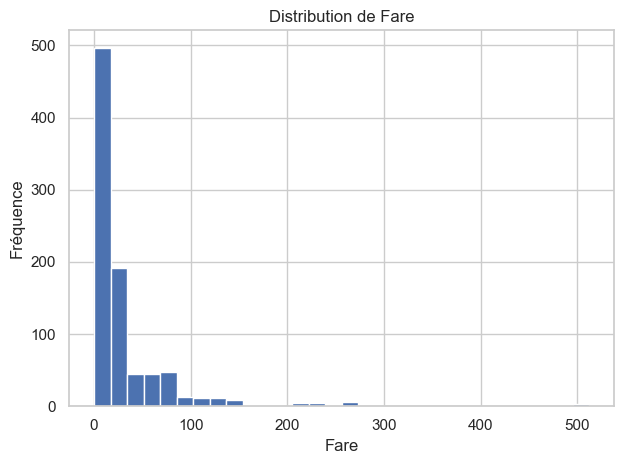

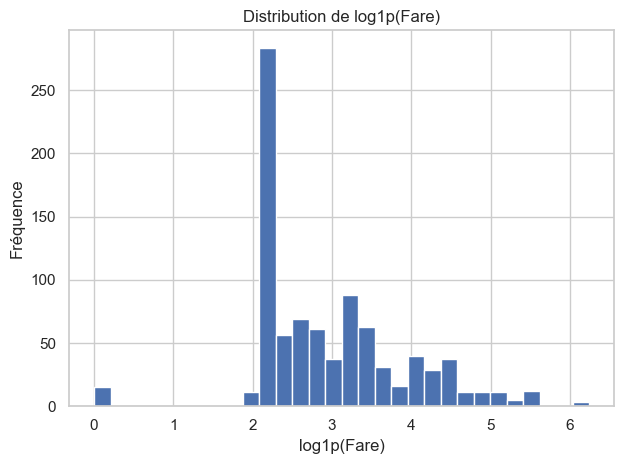

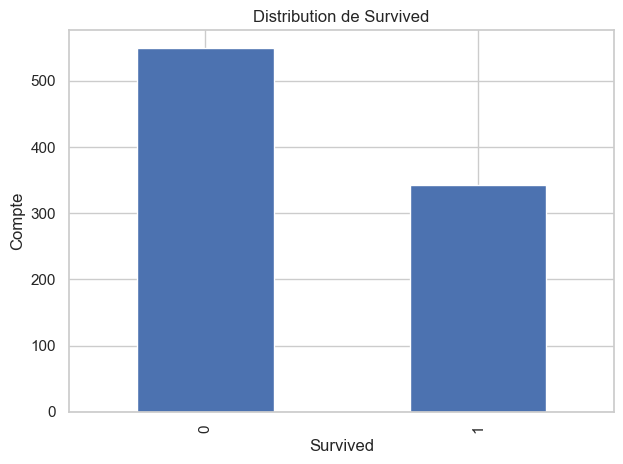

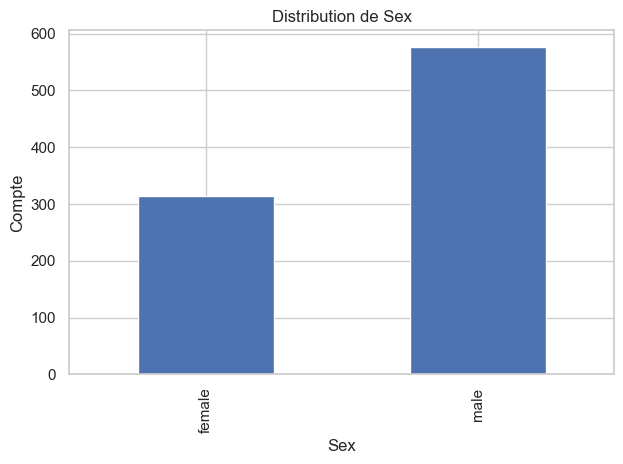

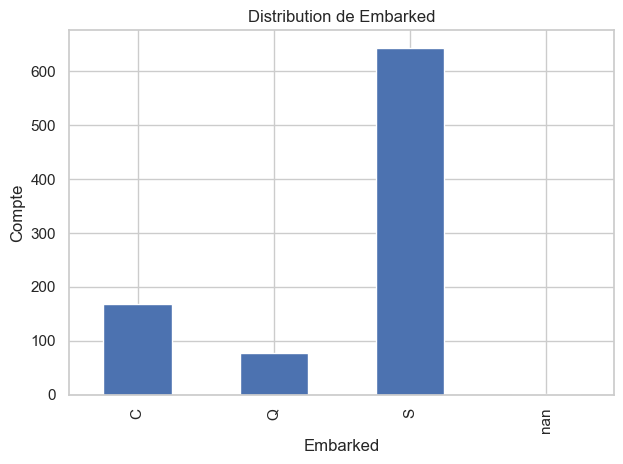

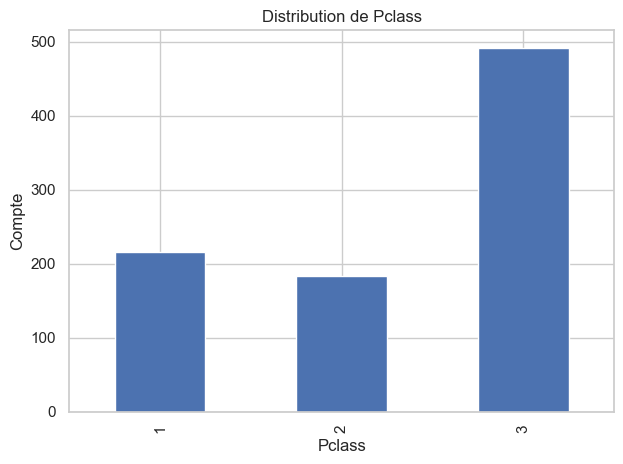

<Figure size 640x480 with 0 Axes>

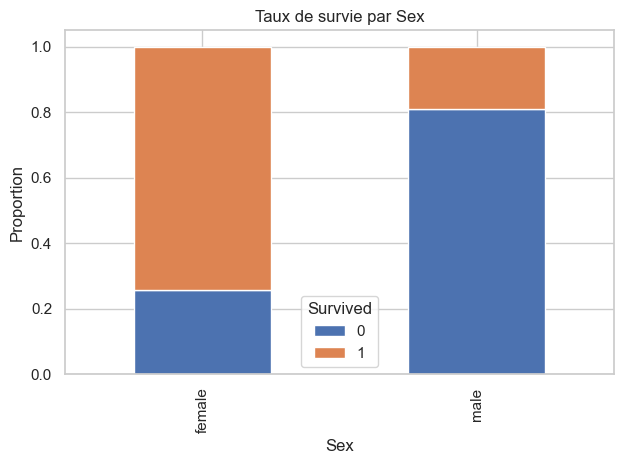

<Figure size 640x480 with 0 Axes>

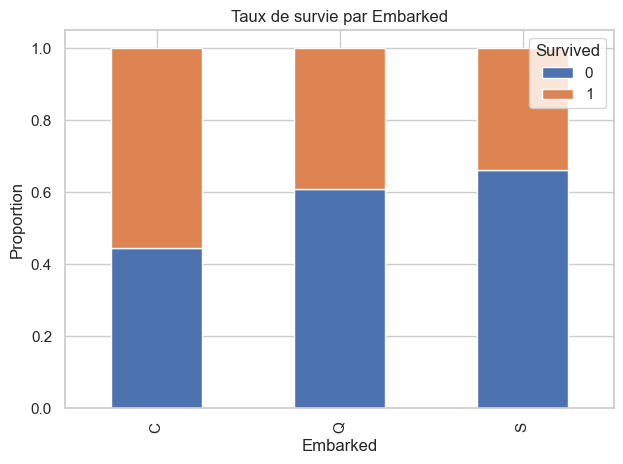

<Figure size 640x480 with 0 Axes>

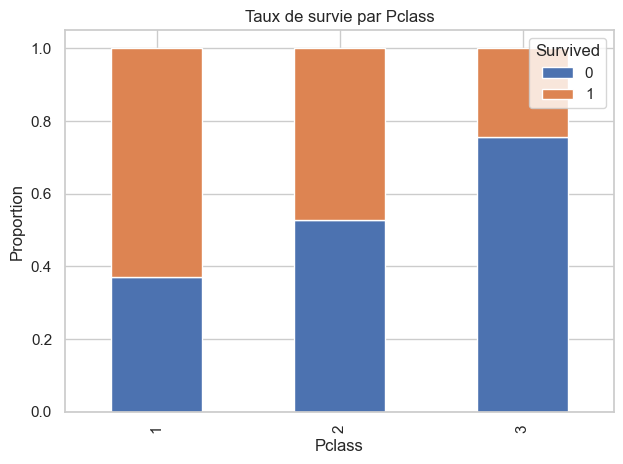

C:\Users\Israël TODOME\AppData\Local\Temp\ipykernel_19408\53543348.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Non', 'Oui'], showmeans=True)


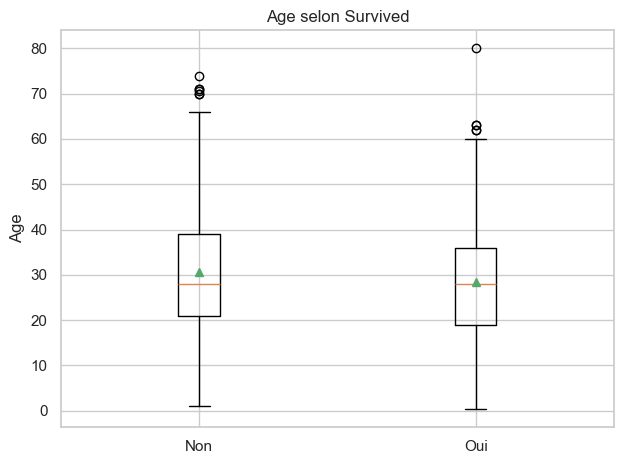

C:\Users\Israël TODOME\AppData\Local\Temp\ipykernel_19408\53543348.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Non', 'Oui'], showmeans=True)


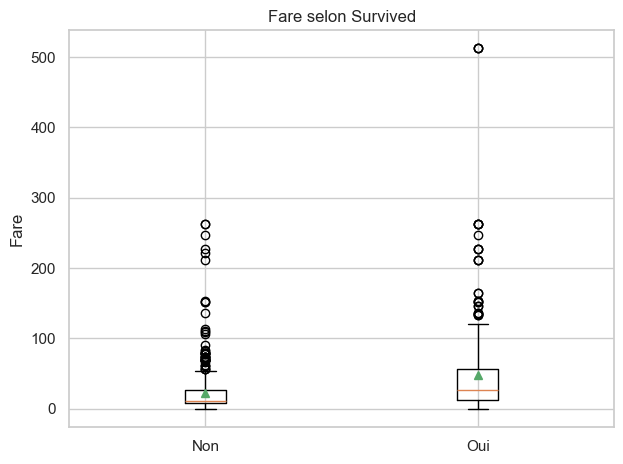

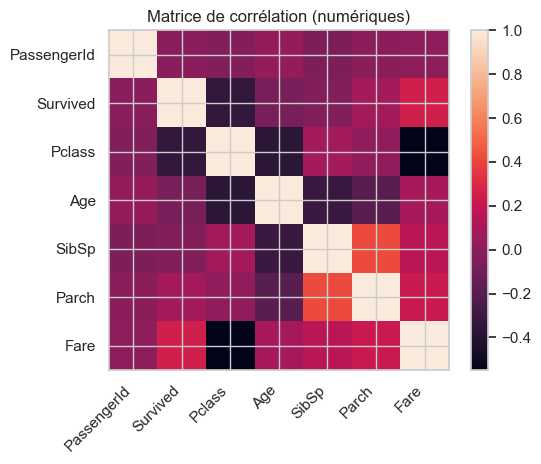

In [120]:
#Visualisation des données avec matplotlib 
def visualize_titanic(df: pd.DataFrame, n_rows_preview: int = 10) -> None:
    # ===== 0) Aperçu propre =====
    with pd.option_context('display.max_columns', None,
                           'display.width', 140,
                           'display.colheader_justify', 'center'):
        print("=== Aperçu DataFrame ===")
        print(df.head(n_rows_preview).to_string(index=False))
        print("\n=== Dimensions:", df.shape, "===")
        print("\n=== Types ===")
        print(df.dtypes.to_string())
        print("\n=== NaN par colonne ===")
        print(df.isna().sum().sort_values(ascending=False).to_string())

    # ===== 1) Valeurs manquantes (barres) =====
    na_counts = df.isna().sum().sort_values(ascending=False)
    na_counts = na_counts[na_counts > 0]
    if not na_counts.empty:
        plt.figure()
        na_counts.plot(kind='bar')
        plt.title('Valeurs manquantes par colonne')
        plt.ylabel('Nombre de NaN')
        plt.tight_layout()
        plt.show()

    # ===== 2) Distributions numériques =====
    for col in ['Age', 'Fare']:
        if col in df.columns:
            # Histogramme brut
            plt.figure()
            df[col].dropna().hist(bins=30)
            plt.title(f'Distribution de {col}')
            plt.xlabel(col); plt.ylabel('Fréquence')
            plt.tight_layout()
            plt.show()

            # Version log pour Fare (utile car très asymétrique)
            if col == 'Fare':
                plt.figure()
                np.log1p(df['Fare'].dropna()).hist(bins=30)
                plt.title('Distribution de log1p(Fare)')
                plt.xlabel('log1p(Fare)'); plt.ylabel('Fréquence')
                plt.tight_layout()
                plt.show()

    # ===== 3) Catégorielles : répartition =====
    for col in ['Survived', 'Sex', 'Embarked', 'Pclass']:
        if col in df.columns:
            vc = df[col].value_counts(dropna=False).sort_index()
            plt.figure()
            vc.plot(kind='bar')
            plt.title(f'Distribution de {col}')
            plt.ylabel('Compte')
            plt.tight_layout()
            plt.show()

    # ===== 4) Taux de survie par catégorie (barres empilées) =====
    if 'Survived' in df.columns:
        for col in ['Sex', 'Embarked', 'Pclass']:
            if col in df.columns:
                ct = pd.crosstab(df[col], df['Survived'], normalize='index')
                plt.figure()
                ct.plot(kind='bar', stacked=True)
                plt.title(f'Taux de survie par {col}')
                plt.ylabel('Proportion')
                plt.legend(title='Survived', loc='best')
                plt.tight_layout()
                plt.show()

    # ===== 5) Boxplots: Age/Fare vs Survived =====
    if 'Survived' in df.columns:
        for col in ['Age', 'Fare']:
            if col in df.columns:
                data = [
                    df.loc[df['Survived'] == 0, col].dropna(),
                    df.loc[df['Survived'] == 1, col].dropna()
                ]
                if len(data[0]) > 0 and len(data[1]) > 0:
                    plt.figure()
                    plt.boxplot(data, labels=['Non', 'Oui'], showmeans=True)
                    plt.title(f'{col} selon Survived')
                    plt.ylabel(col)
                    plt.tight_layout()
                    plt.show()

    # ===== 6) Corrélation numérique =====
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        corr = df[num_cols].corr(numeric_only=True)
        if corr.size > 0:
            plt.figure()
            img = plt.imshow(corr, interpolation='nearest')
            plt.title('Matrice de corrélation (numériques)')
            plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
            plt.yticks(range(len(num_cols)), num_cols)
            plt.colorbar(img, fraction=0.046, pad=0.04)
            plt.tight_layout()
            plt.show()

# === Utilisation ===
visualize_titanic(df_train)


=== Aperçu DataFrame ===
 PassengerId  Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1         0       3                             Braund, Mr. Owen Harris   male 22.0      1      0        A/5 21171  7.2500   NaN        S
           2         1       1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0      1      0         PC 17599 71.2833   C85        C
           3         1       3                              Heikkinen, Miss. Laina female 26.0      0      0 STON/O2. 3101282  7.9250   NaN        S
           4         1       1        Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0      1      0           113803 53.1000  C123        S
           5         0       3                            Allen, Mr. William Henry   male 35.0      0      0           373450  8.0500   NaN        S
           6         0       3                                    Moran, Mr. Jame

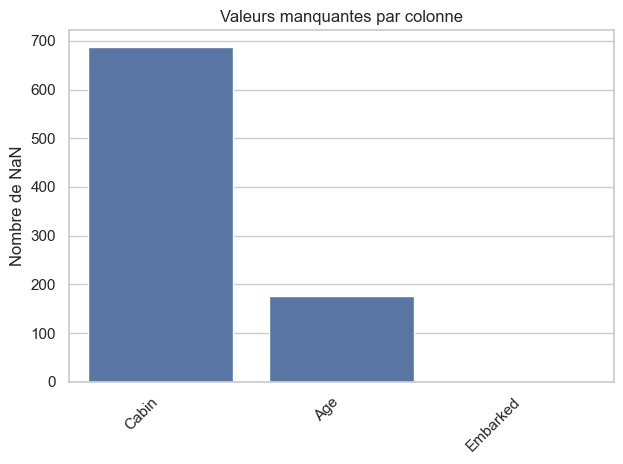

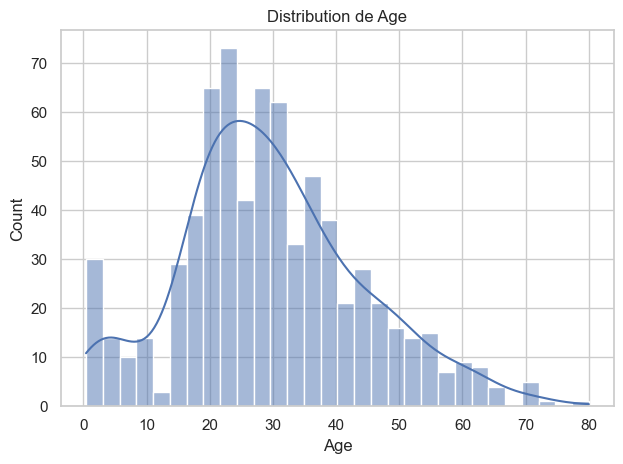

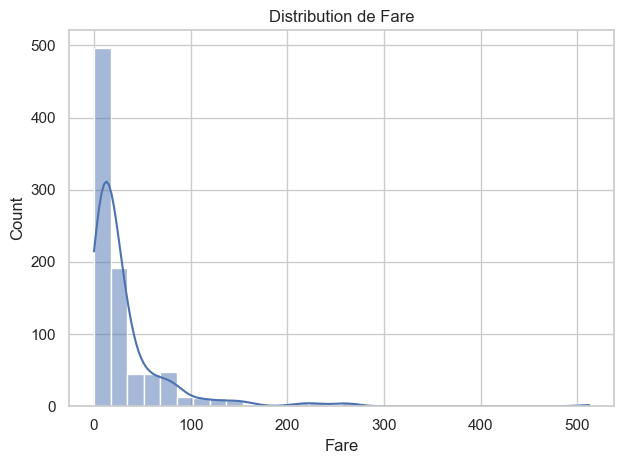

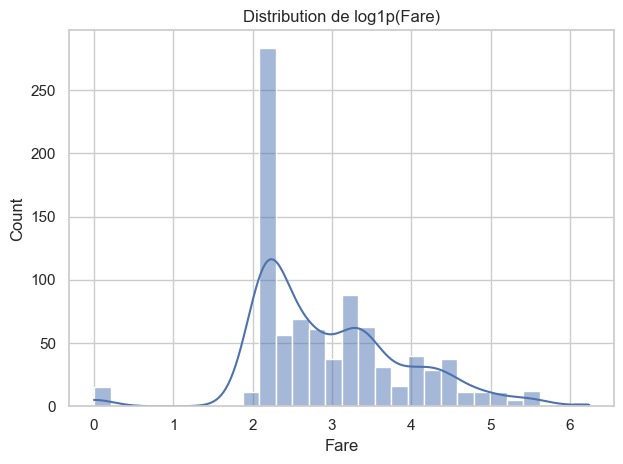

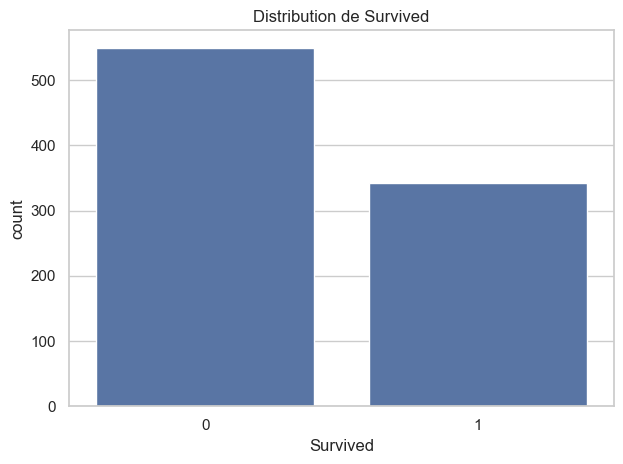

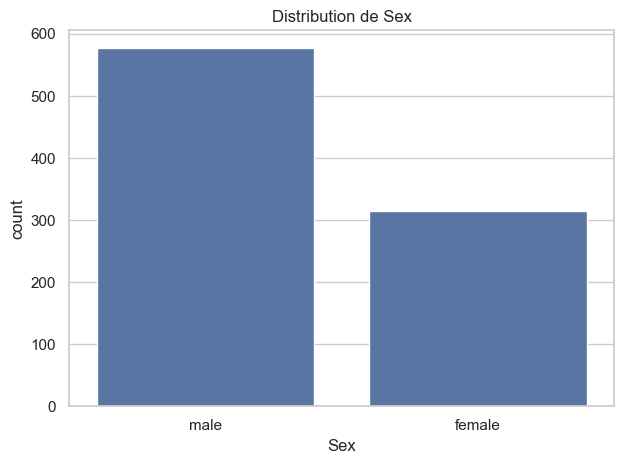

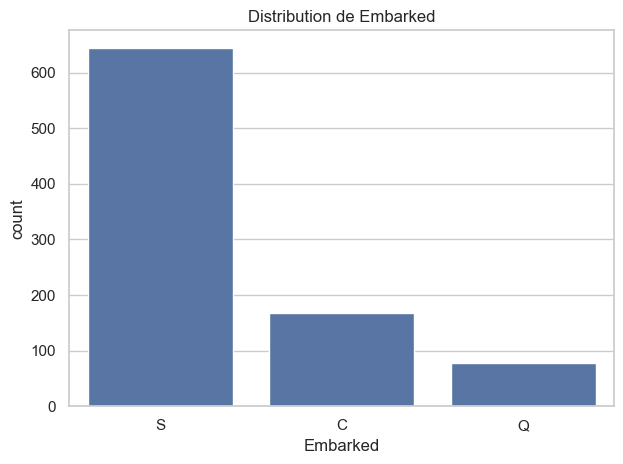

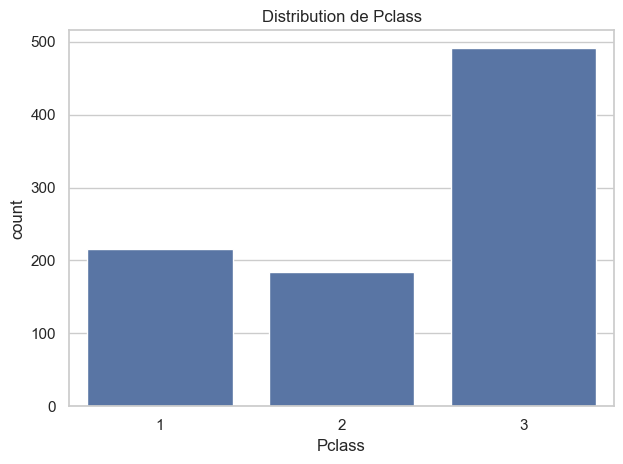

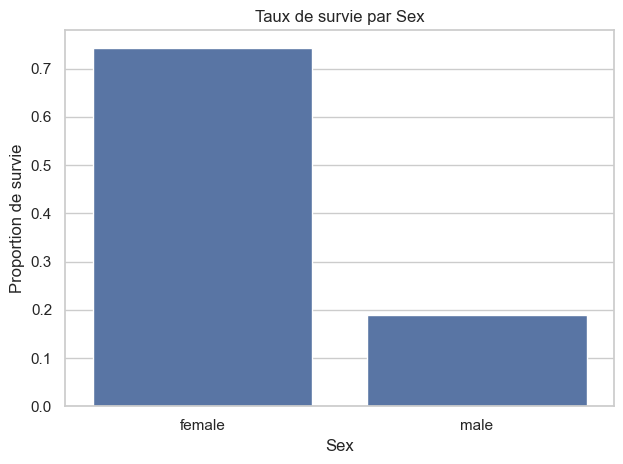

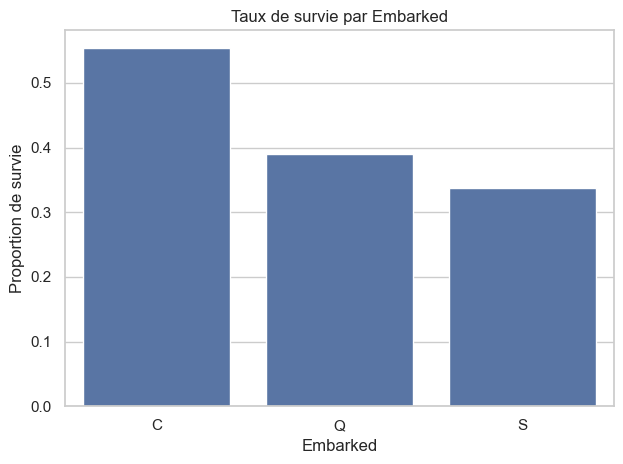

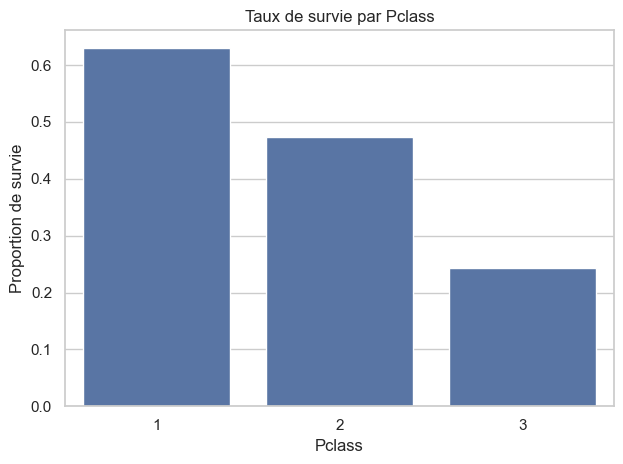

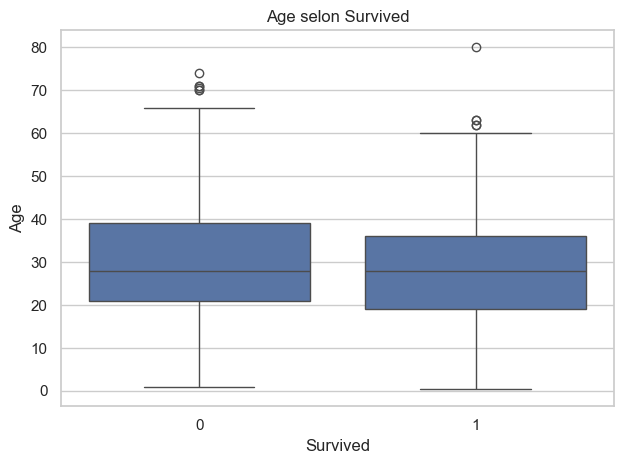

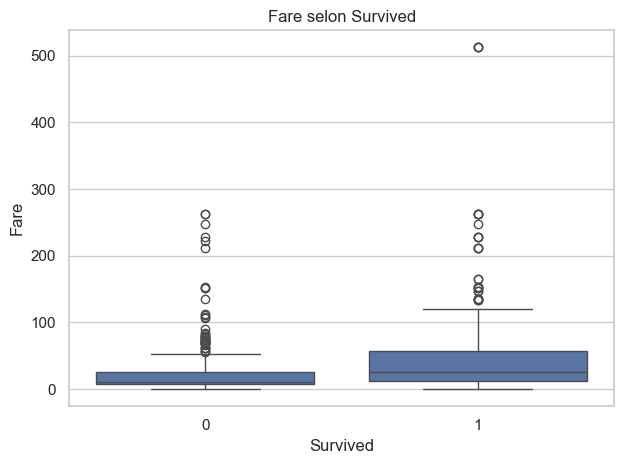

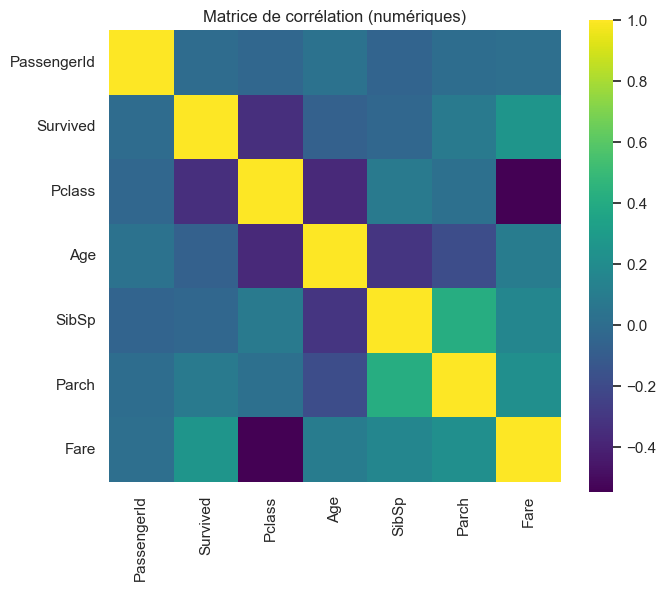

In [121]:
#Visualisation des données avec seaborn

def visualize_titanic_seaborn(df: pd.DataFrame, n_rows_preview: int = 10) -> None:
    sns.set_theme(context="notebook", style="whitegrid")

    # Aperçu
    with pd.option_context('display.max_columns', None, 'display.width', 140):
        print("=== Aperçu DataFrame ===")
        print(df.head(n_rows_preview).to_string(index=False))
        print("\n=== Dimensions:", df.shape, "===")
        print("\n=== Types ===")
        print(df.dtypes.to_string())
        print("\n=== NaN par colonne ===")
        print(df.isna().sum().sort_values(ascending=False).to_string())

    # 1) Manquants
    na_counts = df.isna().sum().sort_values(ascending=False)
    na_counts = na_counts[na_counts > 0]
    if not na_counts.empty:
        plt.figure()
        sns.barplot(x=na_counts.index, y=na_counts.values)
        plt.title("Valeurs manquantes par colonne"); plt.ylabel("Nombre de NaN"); plt.xlabel("")
        plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()

    # 2) Distributions numériques
    for col in ['Age', 'Fare']:
        if col in df.columns:
            plt.figure()
            sns.histplot(df[col].dropna(), bins=30, kde=True)
            plt.title(f"Distribution de {col}"); plt.tight_layout(); plt.show()

            if col == 'Fare':
                plt.figure()
                sns.histplot(np.log1p(df['Fare'].dropna()), bins=30, kde=True)
                plt.title("Distribution de log1p(Fare)"); plt.tight_layout(); plt.show()

    # 3) Catégorielles: distributions
    for col in ['Survived','Sex','Embarked','Pclass']:
        if col in df.columns:
            plt.figure()
            sns.countplot(x=col, data=df)
            plt.title(f"Distribution de {col}")
            plt.tight_layout(); plt.show()

    # 4) Taux de survie par catégorie
    if 'Survived' in df.columns:
        for col in ['Sex','Embarked','Pclass']:
            if col in df.columns:
                rate = df.groupby(col)['Survived'].mean().reset_index()
                plt.figure()
                sns.barplot(x=col, y='Survived', data=rate)
                plt.title(f"Taux de survie par {col}"); plt.ylabel("Proportion de survie")
                plt.tight_layout(); plt.show()

    # 5) Box/violin: Age & Fare vs Survived
    if 'Survived' in df.columns:
        for col in ['Age','Fare']:
            if col in df.columns:
                plt.figure()
                sns.boxplot(x='Survived', y=col, data=df)
                plt.title(f"{col} selon Survived"); plt.tight_layout(); plt.show()

    # 6) Corrélation numérique
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        corr = df[num_cols].corr(numeric_only=True)
        if corr.size > 0:
            plt.figure(figsize=(7,6))
            sns.heatmap(corr, annot=False, cmap="viridis", square=True)
            plt.title("Matrice de corrélation (numériques)")
            plt.tight_layout(); plt.show()

# Utilisation:
visualize_titanic_seaborn(df_train)


Entraînement et évaluation du modèle

In [122]:
# ===================== UTILITAIRES D’ÉVALUATION / SEUIL =====================
def eval_at_threshold(y_true, y_score, thr: float):
    y_pred = (y_score >= thr).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    total = cm.sum()
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)  # TPR
    f1   = f1_score(y_true, y_pred, zero_division=0)
    tpr = rec
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0.0
    return {
        'thr': thr, 'cm': cm, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'total': total,
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1,
        'TPR': tpr, 'FPR': fpr, 'TNR': tnr, 'FNR': fnr
    }

def pick_threshold_for_recall_with_constraints(
    y_true, y_score, recall_target=0.90, max_fpr=None, min_precision=None
):
    # Balayage des seuils et calcul des métriques
    prec_arr, rec_arr, thr_arr = precision_recall_curve(y_true, y_score)
    thresholds = np.unique(np.concatenate(([0.0, 0.5, 1.0], thr_arr)))

    rows = []
    for t in thresholds:
        y_hat = (y_score >= t).astype(int)
        cm = confusion_matrix(y_true, y_hat)
        tn, fp, fn, tp = cm.ravel()
        total = cm.sum()
        acc  = accuracy_score(y_true, y_hat)
        prec = precision_score(y_true, y_hat, zero_division=0)
        rec  = recall_score(y_true, y_hat, zero_division=0)
        f1   = f1_score(y_true, y_hat, zero_division=0)
        fpr  = fp / (fp + tn) if (fp + tn) > 0 else 0.0
        rows.append([t, tp, fp, fn, tn, total, acc, prec, rec, f1, fpr])

    df_thr = pd.DataFrame(rows, columns=["threshold","TP","FP","FN","TN","Total","Accuracy","Precision","Recall","F1","FPR"])

    # Contraintes : Recall ≥ cible (+ FPR / Precision si fournis)
    cand = df_thr[df_thr["Recall"] >= recall_target].copy()
    if max_fpr is not None:
        cand = cand[cand["FPR"] <= max_fpr]
    if min_precision is not None:
        cand = cand[cand["Precision"] >= min_precision]

    if not cand.empty:
        cand = cand.sort_values(by=["Precision","F1","threshold"], ascending=[False, False, False])
        best = cand.iloc[0]
        return float(best["threshold"]), best, df_thr

    # Plan B : meilleur F1 sous Recall ≥ cible (sans autres contraintes)
    cand2 = df_thr[df_thr["Recall"] >= recall_target].copy()
    if not cand2.empty:
        cand2 = cand2.sort_values(by=["F1","Precision","threshold"], ascending=[False, False, False])
        best = cand2.iloc[0]
        return float(best["threshold"]), best, df_thr

    # Fallback : seuil le plus proche de 0.5
    best_row = df_thr.loc[(df_thr["threshold"]-0.5).abs().idxmin()]
    return 0.5, best_row, df_thr

# === Sélection d’un seuil par bande de précision (0.85–0.90) ===
def pick_threshold_by_precision_band(y_true, y_score, prec_min=0.85, prec_max=0.90):
    prec_arr, rec_arr, thr_arr = precision_recall_curve(y_true, y_score)
    thresholds = np.unique(np.concatenate(([0.0, 0.5, 1.0], thr_arr)))

    rows = []
    for t in thresholds:
        m = eval_at_threshold(y_true, y_score, thr=float(t))
        # ⚠️ clés en minuscules (tp/fp/fn/tn) comme renvoyées par eval_at_threshold
        rows.append([
            float(t), m['precision'], m['recall'], m['f1'],
            m['accuracy'], m['FPR'], m['tp'], m['fp'], m['fn'], m['tn']
        ])
    df_band = pd.DataFrame(rows, columns=["threshold","Precision","Recall","F1","Accuracy","FPR","tp","fp","fn","tn"])

    cand = df_band[(df_band["Precision"] >= prec_min) & (df_band["Precision"] <= prec_max)].copy()
    if not cand.empty:
        cand = cand.sort_values(by=["Recall","F1","threshold"], ascending=[False, False, False])
        return float(cand.iloc[0]["threshold"]), cand

    # Sinon: seuil le plus proche AU-DESSUS de prec_min, sinon le plus proche tout court
    df_band["gap"] = np.where(df_band["Precision"] >= prec_min,
                              df_band["Precision"] - prec_min,
                              prec_min - df_band["Precision"])
    above = df_band[df_band["Precision"] >= prec_min].sort_values(
        ["gap","Recall","F1","threshold"], ascending=[True, False, False, False]
    )
    best_row = above.iloc[0] if not above.empty else df_band.sort_values(
        ["gap","Recall","F1","threshold"], ascending=[True, False, False, False]
    ).iloc[0]
    return float(best_row["threshold"]), df_band

# === CV pour stabiliser le seuil trouvé dans la bande de précision ===
def cross_validated_threshold(X, y, pipe_factory, k=5, prec_min=0.85, prec_max=0.90, random_state=42):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)
    thr_list, fold_metrics = [], []

    for fold, (tr, va) in enumerate(skf.split(X, y), 1):
        X_tr, X_va = X.iloc[tr], X.iloc[va]
        y_tr, y_va = y.iloc[tr], y.iloc[va]

        pipe = pipe_factory()  # pipeline neuf à chaque fold
        pipe.fit(X_tr, y_tr)

        y_proba = pipe.predict_proba(X_va)[:, 1]
        thr_fold, _ = pick_threshold_by_precision_band(y_va, y_proba, prec_min, prec_max)
        thr_list.append(thr_fold)

        m = eval_at_threshold(y_va, y_proba, thr_fold)
        fold_metrics.append({
            "fold": fold, "thr": thr_fold,
            "precision": m["precision"], "recall": m["recall"],
            "f1": m["f1"], "accuracy": m["accuracy"], "FPR": m["FPR"]
        })

    thr_mean = float(np.mean(thr_list))
    thr_std  = float(np.std(thr_list))
    return thr_mean, thr_std, pd.DataFrame(fold_metrics), thr_list

# ===================== ENTRAÎNEMENT + CHOIX DE SEUIL (réutilise TON prétraitement) =====================
# 0) Prétraitement & normalisation (ta fonction déjà définie)
df_clean, pre, _ = preprocess_keepcols_and_preview(df_train, n_rows=10)

# 1) Features/cible (cohérentes avec 'pre')
num_skew = [c for c in ['Fare'] if c in df_clean.columns]  # log1p + Z
num_std  = [c for c in ['Age','SibSp','Parch','Pclass','FamilySize','IsAlone'] if c in df_clean.columns]
cat_cols = [c for c in ['Sex','Embarked','Title','IsChild','Sex_Pclass'] if c in df_clean.columns]
features = num_skew + num_std + cat_cols

X = df_clean[features].copy()
y = df_clean['Survived'].astype(int)

# 2) Split stratifié
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3) Pipeline final : réutilise 'pre' + LogReg balanced
pipe = Pipeline([
    ('pre', pre),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'))
])

# 4) Mini-tuning (GridSearch sur C)
param_grid = {'clf__C': [0.3, 1, 3, 10]}
gs = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
gs.fit(X_tr, y_tr)
pipe_best = gs.best_estimator_
best_C = gs.best_params_["clf__C"]
print("Best C:", gs.best_params_)

# 5) Probas + AUC (validation)
y_proba = pipe_best.predict_proba(X_va)[:, 1]
auc_val = roc_auc_score(y_va, y_proba)

# 6) Seuil par défaut 0.5
res_def = eval_at_threshold(y_va, y_proba, thr=0.5)

# 7) Seuil contraint (rappel élevé + bornes FPR/Precision)
RECALL_CIBLE  = 0.90
MAX_FPR       = 0.35
MIN_PRECISION = 0.55

thr_recall, row_recall, df_thr_full = pick_threshold_for_recall_with_constraints(
    y_true=y_va, y_score=y_proba,
    recall_target=RECALL_CIBLE,
    max_fpr=MAX_FPR,
    min_precision=MIN_PRECISION
)
res_recall = eval_at_threshold(y_va, y_proba, thr=thr_recall)

# 8) AUC CV (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_cv = cross_val_score(pipe_best, X, y, cv=cv, scoring='roc_auc')
auc_cv_list = [round(float(v), 4) for v in auc_cv]
auc_cv_mean = round(float(np.mean(auc_cv)), 4)

# ===================== (NOUVEAU) SÉLECTION DE SEUIL PAR BANDE DE PRÉCISION =====================
PREC_MIN, PREC_MAX = 0.85, 0.90  # bande cible précision survivants

prec_arr, rec_arr, thr_arr = precision_recall_curve(y_va, y_proba)
thresholds = np.unique(np.concatenate(([0.0, 0.5, 1.0], thr_arr)))

rows = []
for t in thresholds:
    m = eval_at_threshold(y_va, y_proba, thr=float(t))
    rows.append([
        float(t), m['precision'], m['recall'], m['f1'],
        m['accuracy'], m['TPR'], m['FPR'], m['TNR'], m['FNR'],
        m['tp'], m['fp'], m['fn'], m['tn']
    ])

df_band = pd.DataFrame(
    rows, columns=["threshold","Precision","Recall","F1","Accuracy","TPR","FPR","TNR","FNR","tp","fp","fn","tn"]
)

cand = df_band[(df_band["Precision"] >= PREC_MIN) & (df_band["Precision"] <= PREC_MAX)].copy()

if cand.empty:
    print(f"\nAucun seuil avec Precision ∈ [{PREC_MIN:.2f}, {PREC_MAX:.2f}].")
    df_band["gap"] = np.where(df_band["Precision"] >= PREC_MIN,
                              df_band["Precision"] - PREC_MIN,
                              PREC_MIN - df_band["Precision"])
    above = df_band[df_band["Precision"] >= PREC_MIN].sort_values(
        ["gap","Recall","F1","threshold"], ascending=[True, False, False, False]
    )
    near  = df_band.sort_values(["gap","Recall","F1","threshold"], ascending=[True, False, False, False])
    best_row = (above.iloc[0] if not above.empty else near.iloc[0])
    print("\n>>> Seuil le plus proche de la bande (hors contrainte stricte) :")
    print(best_row.to_string())
else:
    cand = cand.sort_values(by=["Recall","F1","threshold"], ascending=[False, False, False])
    best_row = cand.iloc[0]
    print(f"\n=== Seuil choisi (Precision ∈ [{PREC_MIN:.2f}, {PREC_MAX:.2f}]) ===")
    print(best_row.to_string())

print("\n--- RÉSUMÉ (seuil bande précision, split courant) ---")
print(f"Seuil={best_row['threshold']:.4f} | Prec={best_row['Precision']:.4f} | Rec={best_row['Recall']:.4f} | F1={best_row['F1']:.4f} | "
      f"Acc={best_row['Accuracy']:.4f} | FPR={best_row['FPR']:.4f} | TNR={best_row.get('TNR', np.nan):.4f} | "
      f"TP={int(best_row['tp'])} | FP={int(best_row['fp'])} | FN={int(best_row['fn'])} | TN={int(best_row['tn'])}")

# ===================== (NOUVEAU) STABILISATION DU SEUIL PAR CV =====================
def make_pipe_best():
    # clone(pre) = nouvel objet ColumnTransformer propre à chaque fit
    return Pipeline([
        ('pre', clone(pre)),
        ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear', C=best_C))
    ])

thr_mean, thr_std, df_folds, thr_list = cross_validated_threshold(
    X, y, pipe_factory=make_pipe_best, k=5, prec_min=PREC_MIN, prec_max=PREC_MAX, random_state=42
)

print("\n=== Seuil CV-stabilisé (bande précision) ===")
print(f"Seuil_moyen = {thr_mean:.4f}  |  écart-type = {thr_std:.4f}")
print("Détail par fold :")
print(df_folds.to_string(index=False))

# ----- Refit final sur TOUT le train + seuil moyen pour inference -----
pipe_final = make_pipe_best()
pipe_final.fit(X, y)
BEST_THRESHOLD = float(thr_mean)

print(f"\nSeuil final à utiliser en prod/test = {BEST_THRESHOLD:.4f}")
# Exemple d'usage :
# proba_test = pipe_final.predict_proba(X_test)[:, 1]
# pred_test  = (proba_test >= BEST_THRESHOLD).astype(int)

# ===================== SORTIE LISIBLE (récap global) =====================
print("\n================= OBJECTIF : DÉTECTER LES SURVIVANTS (RECALL) =================")
print(f"AUC (validation, seuil-indépendant) = {auc_val:.4f}")

print("\n--- Seuil par défaut (0.5) ---")
print(f"Seuil = {res_def['thr']:.4f} | CM =\n{res_def['cm']}")
print(f"TP = {res_def['tp']} | FP = {res_def['fp']} | FN = {res_def['fn']} | TN = {res_def['tn']} | Total = {res_def['total']}")
print(f"Accuracy={res_def['accuracy']:.4f} | Precision={res_def['precision']:.4f} | Recall={res_def['recall']:.4f} | F1={res_def['f1']:.4f}")
print(f"TPR={res_def['TPR']:.4f} | FPR={res_def['FPR']:.4f} | TNR={res_def['TNR']:.4f} | FNR={res_def['FNR']:.4f}")

print(f"\n--- Seuil pour Recall ≥ {RECALL_CIBLE:.2f} (contraintes : FPR≤{MAX_FPR:.2f}, Precision≥{MIN_PRECISION:.2f}) ---")
print(f"Seuil = {res_recall['thr']:.4f} | CM =\n{res_recall['cm']}")
print(f"TP = {res_recall['tp']} | FP = {res_recall['fp']} | FN = {res_recall['fn']} | TN = {res_recall['tn']} | Total = {res_recall['total']}")
print(f"Accuracy={res_recall['accuracy']:.4f} | Precision={res_recall['precision']:.4f} | Recall={res_recall['recall']:.4f} | F1={res_recall['f1']:.4f}")
print(f"TPR={res_recall['TPR']:.4f} | FPR={res_recall['FPR']:.4f} | TNR={res_recall['TNR']:.4f} | FNR={res_recall['FNR']:.4f}")

print("\n--- Validation croisée (AUC, 5-fold) ---")
print(f"  AUC CV (5-fold): {auc_cv_list}  → moyenne = {auc_cv_mean}")



=== Aperçu DataFrame (enrichi) ===
 PassengerId  Survived  Pclass    Sex   Age  SibSp  Parch  Fare Embarked  Title  FamilySize  IsAlone  IsChild Sex_Pclass
           1         0       3   male 22.00      1      0  7.25        S     Mr           2        0        0     male_3
           2         1       1 female 38.00      1      0 71.28        C    Mrs           2        0        0   female_1
           3         1       3 female 26.00      0      0  7.92        S   Miss           1        1        0   female_3
           4         1       1 female 35.00      1      0 53.10        S    Mrs           2        0        0   female_1
           5         0       3   male 35.00      0      0  8.05        S     Mr           1        1        0     male_3
           6         0       3   male 25.00      0      0  8.46        Q     Mr           1        1        0     male_3
           7         0       1   male 54.00      0      0 51.86        S     Mr           1        1        0     mal

Déploiement du modèle

In [123]:
# ===================== PACKAGING & SOUMISSION KAGGLE =====================
# Objectif : figer le pipeline + seuil, prédire le test Kaggle, produire submission.csv
# Hypothèse : la fonction preprocess_keepcols_and_preview(df, n_rows=...) est déjà définie.

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.base import clone
import joblib, json

# --------------------- 1) Prétraitement train ---------------------
# df_train doit être déjà chargé (train.csv de Kaggle)
df_clean, pre, _ = preprocess_keepcols_and_preview(df_train, n_rows=5)

# --- Features cohérentes avec 'pre' (mêmes qu’au training précédent) ---
num_skew = [c for c in ['Fare'] if c in df_clean.columns]  # log1p + Z-score
num_std  = [c for c in ['Age','SibSp','Parch','Pclass','FamilySize','IsAlone'] if c in df_clean.columns]
cat_cols = [c for c in ['Sex','Embarked','Title','IsChild','Sex_Pclass'] if c in df_clean.columns]
features = num_skew + num_std + cat_cols

X = df_clean[features].copy()
y = df_clean['Survived'].astype(int)

# --------------------- 2) Fit final sur TOUT le train ---------------------
pipe_final = Pipeline([
    ('pre', clone(pre)),  # clone = préprocesseur “neuf”
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear', C=1.0))
])
pipe_final.fit(X, y)

# --------------------- 3) Seuil final (précision ~0.86) ---------------------
# Remplace par ton seuil validé si besoin (ex: issu de la bande [0.85, 0.90])
BEST_THRESHOLD = 0.6316

# (Optionnel) Sanity check sur le train
proba_tr = pipe_final.predict_proba(X)[:, 1]
pred_tr  = (proba_tr >= BEST_THRESHOLD).astype(int)
print("[TRAIN] Acc=%.4f | Prec=%.4f | Rec=%.4f | F1=%.4f | AUC=%.4f" % (
    accuracy_score(y, pred_tr),
    precision_score(y, pred_tr, zero_division=0),
    recall_score(y, pred_tr, zero_division=0),
    f1_score(y, pred_tr, zero_division=0),
    roc_auc_score(y, proba_tr),
))

# --------------------- 4) Sauvegardes (modèle + seuil) ---------------------
joblib.dump(pipe_final, "titanic_logreg_pipeline.joblib")
with open("titanic_threshold.json", "w") as f:
    json.dump({"best_threshold": float(BEST_THRESHOLD)}, f)
print("✔ Modèle sauvegardé: titanic_logreg_pipeline.joblib")
print("✔ Seuil sauvegardé : titanic_threshold.json")

# --------------------- 5) Prétraitement test Kaggle ---------------------
# df_test doit être chargé (test.csv de Kaggle)
df_test, _, _ = preprocess_keepcols_and_preview(df_test, n_rows=5)

# Sécuriser la présence des features (au cas où)
for c in ['FamilySize','IsAlone','IsChild','Sex_Pclass','Title']:
    if c not in df_test.columns and c in df_clean.columns:
        # (Normalement inutile : ta fonction crée déjà ces features pour train & test)
        df_test[c] = np.nan

# Aligner exactement les colonnes
missing_in_test = [c for c in features if c not in df_test.columns]
for c in missing_in_test:
    # Crée la colonne manquante (remplissage neutre)
    df_test[c] = np.nan
X_test = df_test[features].copy()

# --------------------- 6) Prédictions test + export CSV ---------------------
proba_test = pipe_final.predict_proba(X_test)[:, 1]
pred_test  = (proba_test >= BEST_THRESHOLD).astype(int)

submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"].astype(int),
    "Survived": pred_test.astype(int)
})
submission.to_csv("submission.csv", index=False)
print("✔ Fichier Kaggle prêt : submission.csv")

# --------------------- 7) (Optionnel) Métriques par sous-groupes (train) ---------------------
def subgroup_metrics(df, y_true, y_score, thr, col):
    y_pred = (y_score >= thr).astype(int)
    for v in df[col].dropna().unique():
        idx = (df[col] == v).values
        if idx.sum() == 0: 
            continue
        yt, yp, ys = y_true[idx], y_pred[idx], y_score[idx]
        print(f"{col}={v:>8} | n={idx.sum():3d} | Prec={precision_score(yt, yp, zero_division=0):.3f} | Rec={recall_score(yt, yp, zero_division=0):.3f} | AUC={roc_auc_score(yt, ys):.3f}")

print("\n(Subgroups sur le TRAIN, pour sanity-check)")
subgroup_metrics(df_clean, y, proba_tr, BEST_THRESHOLD, 'Sex')
subgroup_metrics(df_clean, y, proba_tr, BEST_THRESHOLD, 'Pclass')



=== Aperçu DataFrame (enrichi) ===
 PassengerId  Survived  Pclass    Sex   Age  SibSp  Parch  Fare Embarked Title  FamilySize  IsAlone  IsChild Sex_Pclass
           1         0       3   male 22.00      1      0  7.25        S    Mr           2        0        0     male_3
           2         1       1 female 38.00      1      0 71.28        C   Mrs           2        0        0   female_1
           3         1       3 female 26.00      0      0  7.92        S  Miss           1        1        0   female_3
           4         1       1 female 35.00      1      0 53.10        S   Mrs           2        0        0   female_1
           5         0       3   male 35.00      0      0  8.05        S    Mr           1        1        0     male_3

=== NaN restants par colonne ===
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
IsChil